In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

df = pd.read_excel('../../dataset/raw/PPG-BP dataset.xlsx')

In [3]:
df.shape

(219, 14)

In [4]:
df = df.rename(columns={
    'Systolic Blood Pressure(mmHg)': 'Systolic BP(mmHg)',
    'Diastolic Blood Pressure(mmHg)': 'Diastolic BP(mmHg)'
})

In [5]:
df.head()

,Num.,subject_ID,Sex(M/F),Age(year),Height(cm),Weight(kg),Systolic BP(mmHg),Diastolic BP(mmHg),Heart Rate(b/m),BMI(kg/m^2),Hypertension,Diabetes,cerebral infarction,cerebrovascular disease
0,1,2,Female,45,152,63,161,89,97,27.268006,Stage 2 hypertension,NaN,NaN,NaN
1,2,3,Female,50,157,50,160,93,76,20.284799,Stage 2 hypertension,NaN,NaN,NaN
2,3,6,Female,47,150,47,101,71,79,20.888889,Normal,NaN,NaN,NaN
3,4,8,Male,45,172,65,136,93,87,21.971336,Prehypertension,NaN,NaN,NaN
4,5,9,Female,46,155,65,123,73,73,27.055151,Prehypertension,NaN,NaN,NaN


In [7]:
df.dtypes

Num.                         int64
subject_ID                   int64
Sex(M/F)                    object
Age(year)                    int64
Height(cm)                   int64
Weight(kg)                   int64
Systolic BP(mmHg)            int64
Diastolic BP(mmHg)           int64
Heart Rate(b/m)              int64
BMI(kg/m^2)                float64
Hypertension                object
Diabetes                    object
cerebral infarction         object
cerebrovascular disease     object
dtype: object

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Num.,219.0,110.000000,63.364028,1.000000,55.500000,110.000000,164.5,219.000000
subject_ID,219.0,156.598174,101.604347,2.000000,85.500000,152.000000,214.5,419.000000
Age(year),219.0,57.168950,15.874327,21.000000,48.000000,58.000000,67.5,86.000000
Height(cm),219.0,161.228311,8.202871,145.000000,155.000000,160.000000,167.0,196.000000
Weight(kg),219.0,60.191781,11.886301,36.000000,52.500000,60.000000,66.5,103.000000
Systolic BP(mmHg),219.0,127.945205,20.377779,80.000000,113.500000,126.000000,139.0,182.000000
Diastolic BP(mmHg),219.0,71.849315,11.111203,42.000000,64.000000,70.000000,78.0,107.000000
Heart Rate(b/m),219.0,73.639269,10.738874,52.000000,66.000000,73.000000,80.0,106.000000
BMI(kg/m^2),219.0,23.107407,4.004459,14.692378,20.549887,22.600263,25.0,37.460978


# Find
1. Missing value
2. All the numerical variables
3. Distribution of numerical variables
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship between independent & dependent variables

## 1. Missing value

In [9]:
# Kiểm tra null trong mỗi feature    
print(df.isnull().sum())

Num.                         0
subject_ID                   0
Sex(M/F)                     0
Age(year)                    0
Height(cm)                   0
Weight(kg)                   0
Systolic BP(mmHg)            0
Diastolic BP(mmHg)           0
Heart Rate(b/m)              0
BMI(kg/m^2)                  0
Hypertension                 0
Diabetes                   181
cerebral infarction        199
cerebrovascular disease    194
dtype: int64


In [10]:
#find missing value category feature
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']

for feature in features_nan:
    print('{}: {} missing values'.format(feature, df[feature].isnull().sum()))

Diabetes: 181 missing values
cerebral infarction: 199 missing values
cerebrovascular disease: 194 missing values


In [11]:
#Replace missing value with a new label
def replace_cat_feature(df,features_nan):
    data=df.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

df=replace_cat_feature(df,features_nan)

df[features_nan].isnull().sum()

Diabetes                   0
cerebral infarction        0
cerebrovascular disease    0
dtype: int64

In [12]:
df.head()

,Num.,subject_ID,Sex(M/F),Age(year),Height(cm),Weight(kg),Systolic BP(mmHg),Diastolic BP(mmHg),Heart Rate(b/m),BMI(kg/m^2),Hypertension,Diabetes,cerebral infarction,cerebrovascular disease
0,1,2,Female,45,152,63,161,89,97,27.268006,Stage 2 hypertension,Missing,Missing,Missing
1,2,3,Female,50,157,50,160,93,76,20.284799,Stage 2 hypertension,Missing,Missing,Missing
2,3,6,Female,47,150,47,101,71,79,20.888889,Normal,Missing,Missing,Missing
3,4,8,Male,45,172,65,136,93,87,21.971336,Prehypertension,Missing,Missing,Missing
4,5,9,Female,46,155,65,123,73,73,27.055151,Prehypertension,Missing,Missing,Missing


## 2. Numerical Variables

In [13]:
#list numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != object and feature not in ['Num.'] + ['subject_ID']] #nếu không phải object sẽ là numerical

print('Number of numerical variables: ', len(numerical_features))

df[numerical_features].head()

Number of numerical variables:  7


,Age(year),Height(cm),Weight(kg),Systolic BP(mmHg),Diastolic BP(mmHg),Heart Rate(b/m),BMI(kg/m^2)
0,45,152,63,161,89,97,27.268006
1,50,157,50,160,93,76,20.284799
2,47,150,47,101,71,79,20.888889
3,45,172,65,136,93,87,21.971336
4,46,155,65,123,73,73,27.055151


In [14]:
# Chuyển đổi cột 'Hypertension' thành
#0 nếu Normal, 1 nếu Stage 1, 2 nếu Stage 2, 3 nếu Pre
def convert_hypertension_status(status):
    if status == "Normal":
        return 0
    elif status == "Stage 1 hypertension":
        return 1
    elif status == "Stage 2 hypertension":
        return 2
    elif status == "Prehypertension":
        return 3
    else:
        return status
    
if df['Hypertension'].dtype == object:
    df['Hypertension'] = df['Hypertension'].apply(convert_hypertension_status)

#giữ nguyên dtype là object
df['Hypertension'] = df['Hypertension'].astype('int')

## 3. Distribution of numerical variables

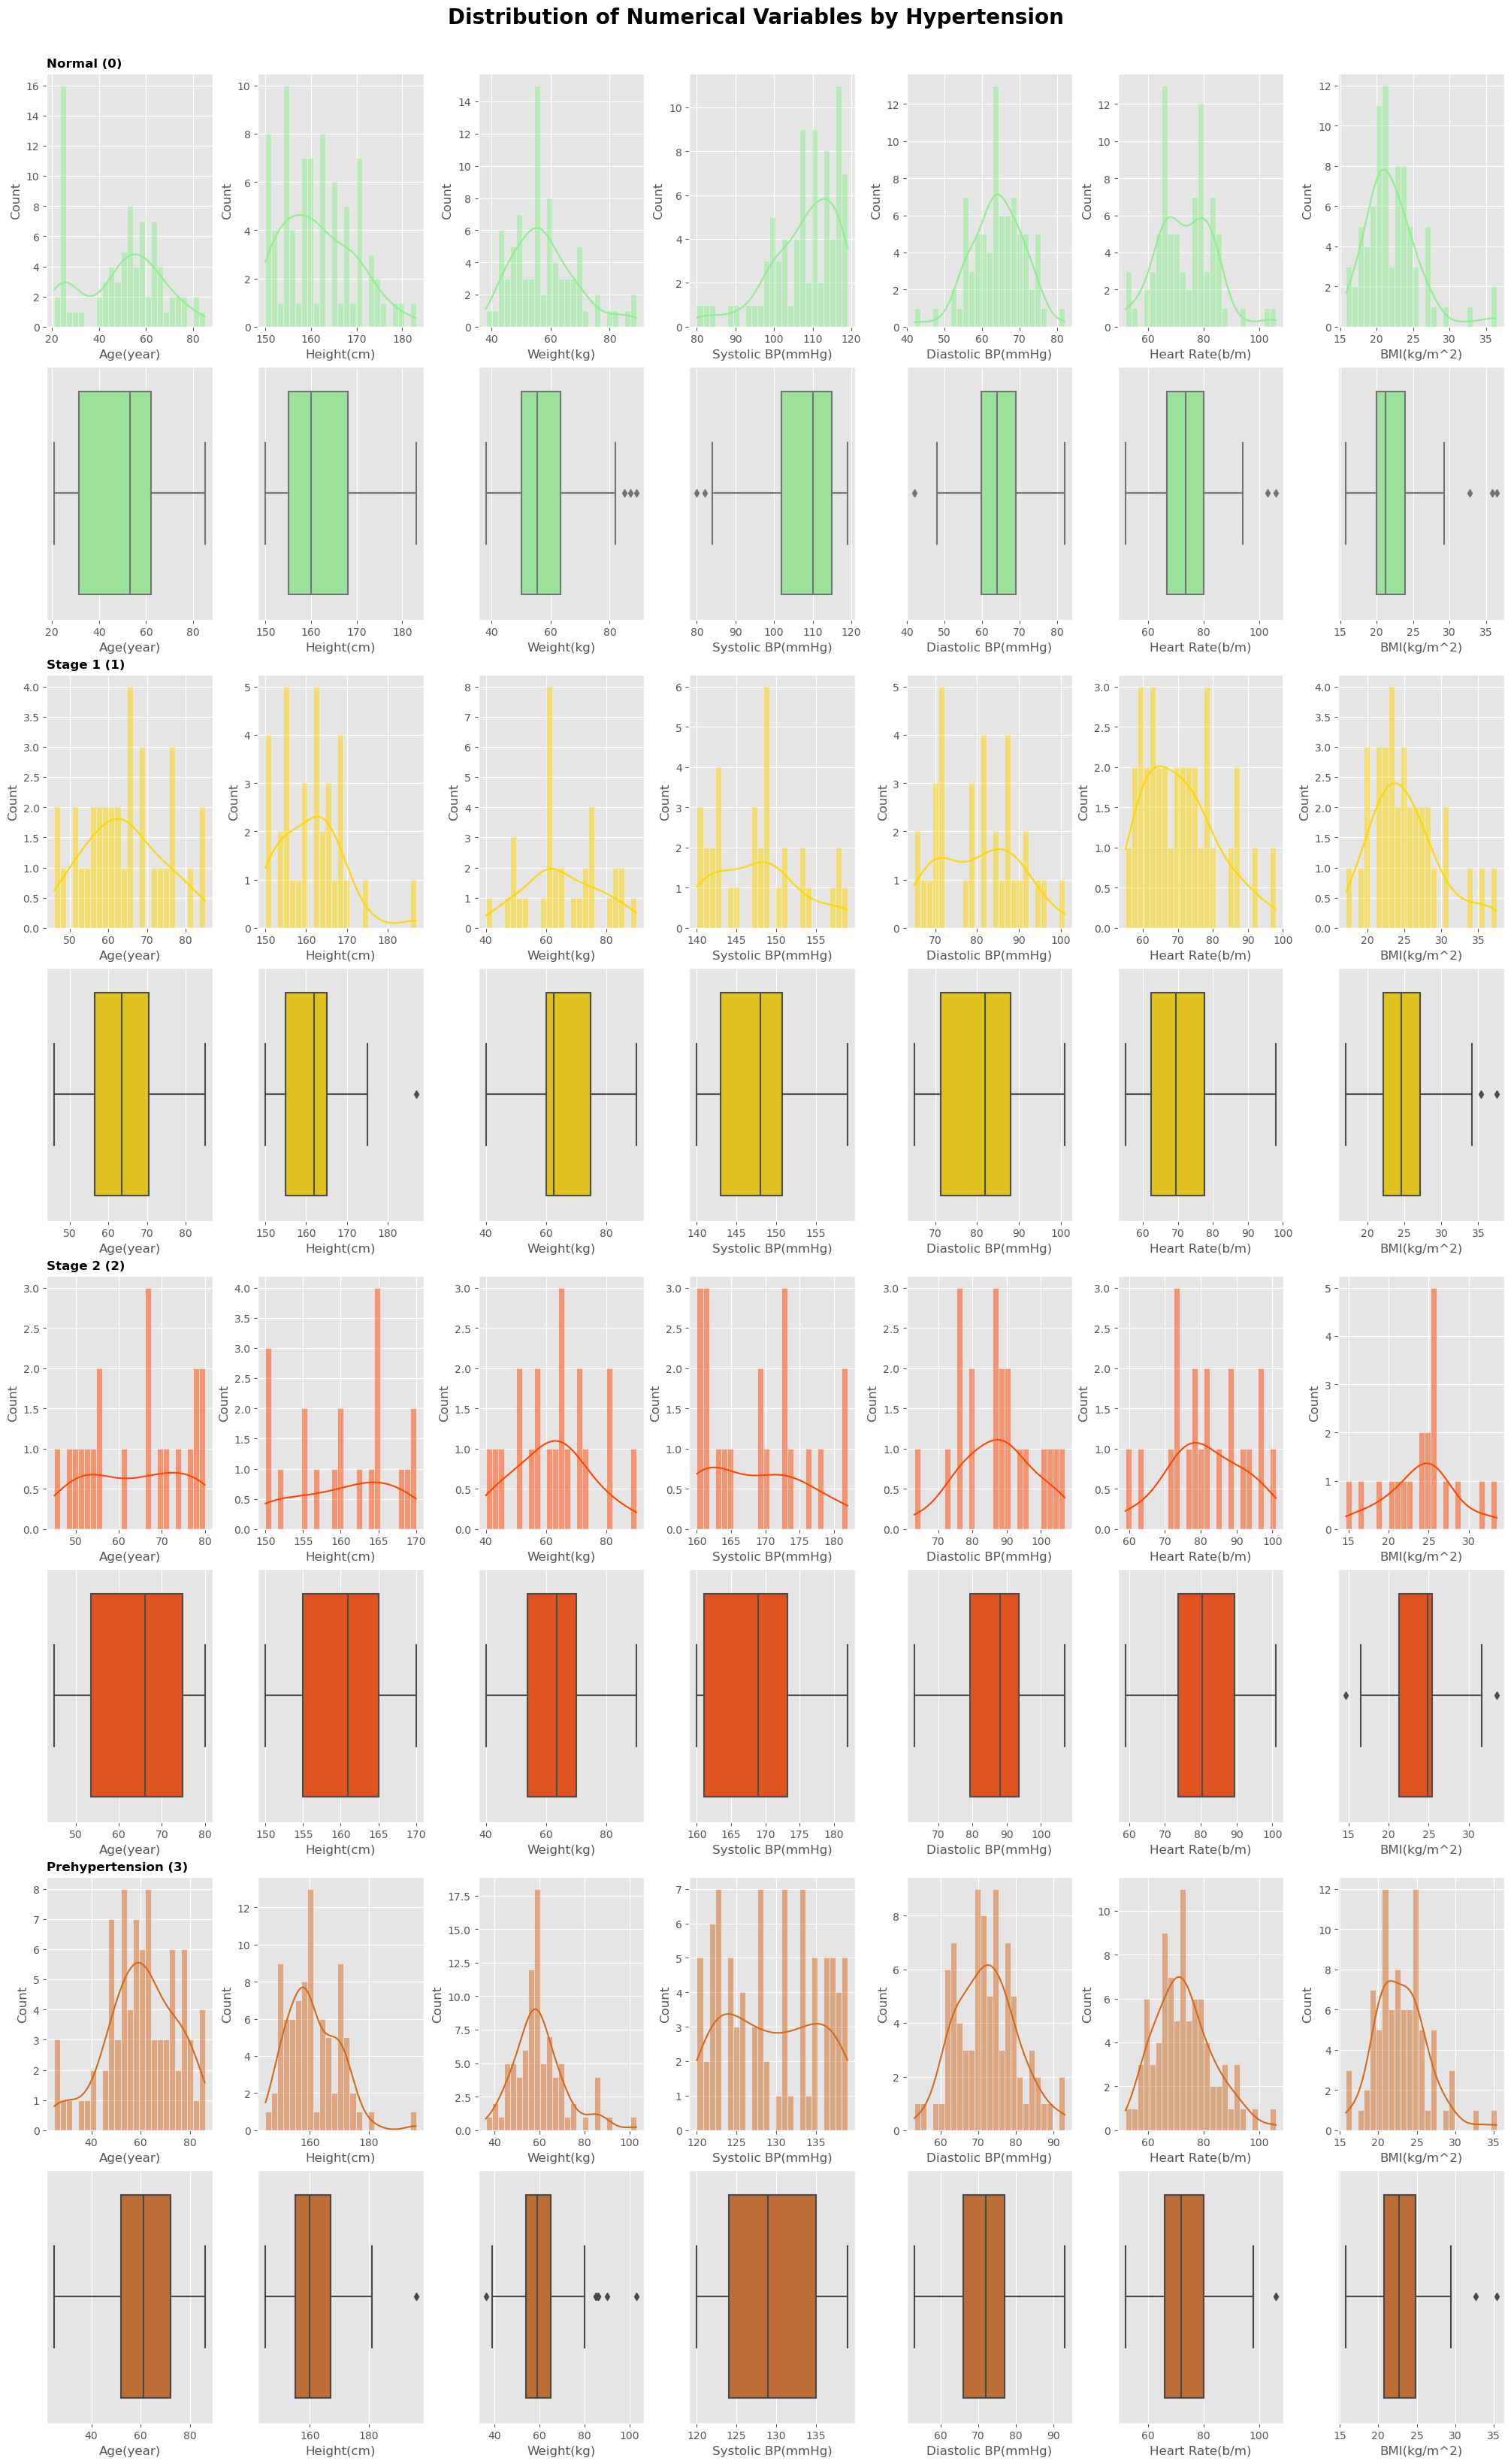

In [19]:
# Tạo dictionary để map các giá trị của Hypertension với tên category
hypertension_labels = {
    0: 'Normal (0)',
    1: 'Stage 1 (1)',
    2: 'Stage 2 (2)',
    3: 'Prehypertension (3)'
}

palette = {
    0: 'lightgreen',
    1: 'gold',
    2: 'orangered',
    3: 'chocolate'
}

# Tạo subplot grid
num_rows = len(hypertension_labels)*2 
num_cols = len(numerical_features)

# Tạo subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 4 * num_rows), constrained_layout=True)

# Vẽ histogram và box plot cho từng category của Hypertension với tất cả numerical data
for row, (label, label_name) in enumerate(hypertension_labels.items()):
    subset_df = df[df['Hypertension'] == label]
    for col, feature in enumerate(numerical_features):
        # Histogram
        ax_hist = axes[row * 2, col]
        sns.histplot(data=subset_df, x=feature, bins=25, kde=True, color=palette[label], ax=ax_hist)
        ax_hist.set_xlabel(feature)
        ax_hist.set_ylabel("Count")
        if col == 0:
            ax_hist.set_title(f'{label_name}', loc='left', fontsize=12, fontweight='bold')
        
        # Boxplot
        ax_box = axes[row * 2 + 1, col]
        sns.boxplot(data=subset_df, x=feature, color=palette[label], ax=ax_box)
        ax_box.set_xlabel(feature)
        ax_box.set_ylabel('')
        ax_box.set_yticks([])  # Ẩn nhãn y-axis của boxplot
        ax_box.set_title('')  # Ẩn tiêu đề của boxplot
        
plt.suptitle("Distribution of Numerical Variables by Hypertension", y=1.02, fontsize=20, fontweight='bold')
# plt.savefig('../fig/distribution_by_hypertension.png')
plt.show()

In [15]:
df['Hypertension'].value_counts()

Hypertension
3    85
0    80
1    34
2    20
Name: count, dtype: int64

1. Age, Weight, Systolic, Diastolic, và BMI đều có mối quan hệ với hypertension. Những người lớn tuổi, có cân nặng và BMI cao hơn có xu hướng mắc bệnh hypertension cao hơn. Đặc biệt, huyết áp tâm thu và tâm trương tăng mạnh theo mức độ của bệnh hypertension.

2. Chiều cao và nhịp tim không có mối quan hệ rõ rệt với mức độ mắc bệnh hypertension.

## 4. Outliers

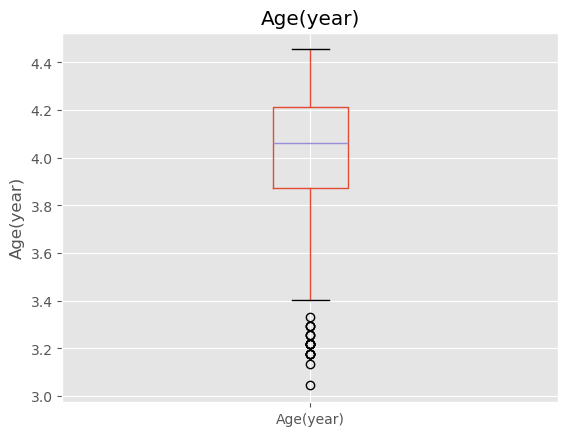

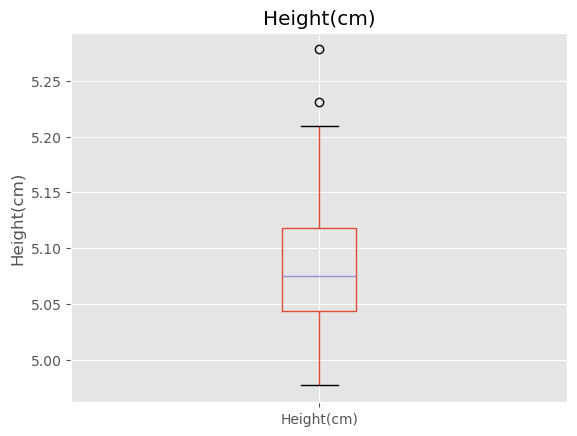

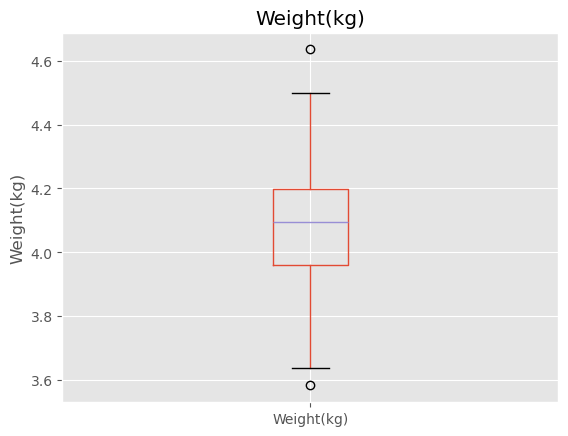

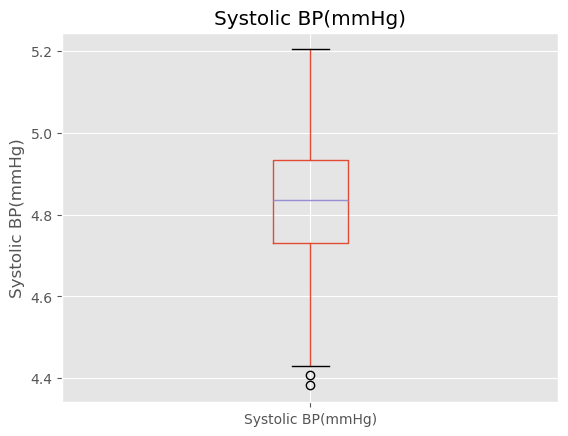

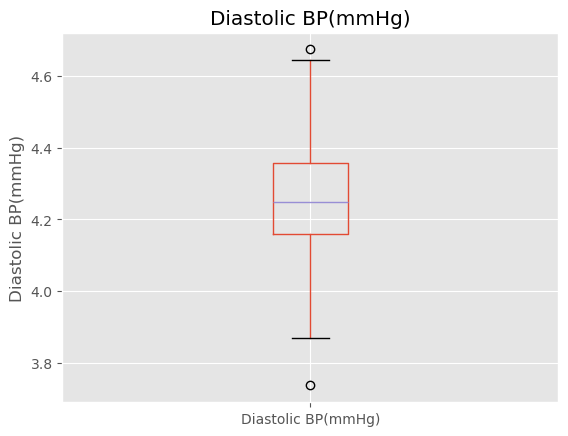

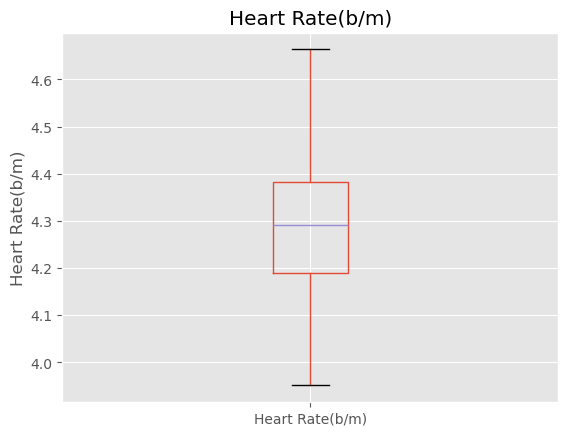

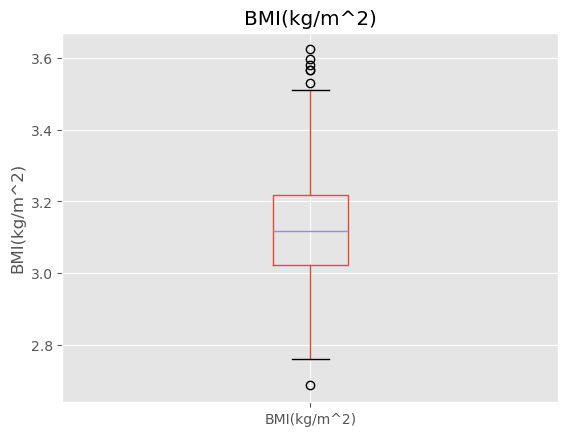

In [16]:
#không dùng được cho categorical feature

#logarithmic transormation
for feature in numerical_features:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

## 5. Categorical Variables

In [16]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
df[categorical_features].head()

,Sex(M/F),Diabetes,cerebral infarction,cerebrovascular disease
0,Female,Missing,Missing,Missing
1,Female,Missing,Missing,Missing
2,Female,Missing,Missing,Missing
3,Male,Missing,Missing,Missing
4,Female,Missing,Missing,Missing


In [17]:
for feature in categorical_features:
    print('{} number of categories are {}'.format(feature,len(df[feature].unique())))

Sex(M/F) number of categories are 2
Diabetes number of categories are 3
cerebral infarction number of categories are 2
cerebrovascular disease number of categories are 3


In [18]:
# Chuyển đổi cột 'Sex(M/F)' thành 1 nếu Male, 0 nếu Female
def convert_sex(status):
    if status == "Male":
        return 1
    elif status == "Female":
        return 0
    else:
        return status
    
if df['Sex(M/F)'].dtype == object:
    df['Sex(M/F)'] = df['Sex(M/F)'].apply(convert_sex)

# Giữ biến 'Sex(M/F)' là object
df['Sex(M/F)'] = df['Sex(M/F)'].astype('object')

In [19]:
# Find out the relationship between categorical variable and dependent feature

In [20]:
# # for feature in categorical_features:
# #     data=df.copy()
# #     ax = data.groupby(feature)['Systolic BP(mmHg)'].median().plot.bar()
# #     plt.xlabel(feature)
# #     plt.ylabel('Systolic BP(mmHg)')
# #     ax.set_xticklabels(ax.get_xticklabels(), rotation=0)# Đặt nhãn trục x nằm ngang 
# #     plt.show()

# # Tạo subplot với 2 cột
# fig, axes = plt.subplots(nrows=len(categorical_features), ncols=2, figsize=(12, 5*len(categorical_features)))

# for i, feature in enumerate(categorical_features):
#     data = df.copy()
    
#     # Biểu đồ cho Systolic BP(mmHg)
#     ax1 = data.groupby(feature)['Systolic BP(mmHg)'].median().plot.bar(ax=axes[i, 0])
#     ax1.set_xlabel(feature)
#     ax1.set_ylabel('Systolic BP(mmHg)')
#     ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
#     ax1.set_title(f'{feature} vs Systolic BP(mmHg)')

#     # Biểu đồ cho Diastolic BP(mmHg)
#     ax2 = data.groupby(feature)['Diastolic BP(mmHg)'].median().plot.bar(ax=axes[i, 1])
#     ax2.set_xlabel(feature)
#     ax2.set_ylabel('Diastolic BP(mmHg)')
#     ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
#     ax2.set_title(f'{feature} vs Diastolic BP(mmHg)')

# # Điều chỉnh khoảng cách giữa các subplot
# plt.tight_layout()

# # Hiển thị biểu đồ
# plt.show()

# Visualization Univariate

# Visualization Multivariate

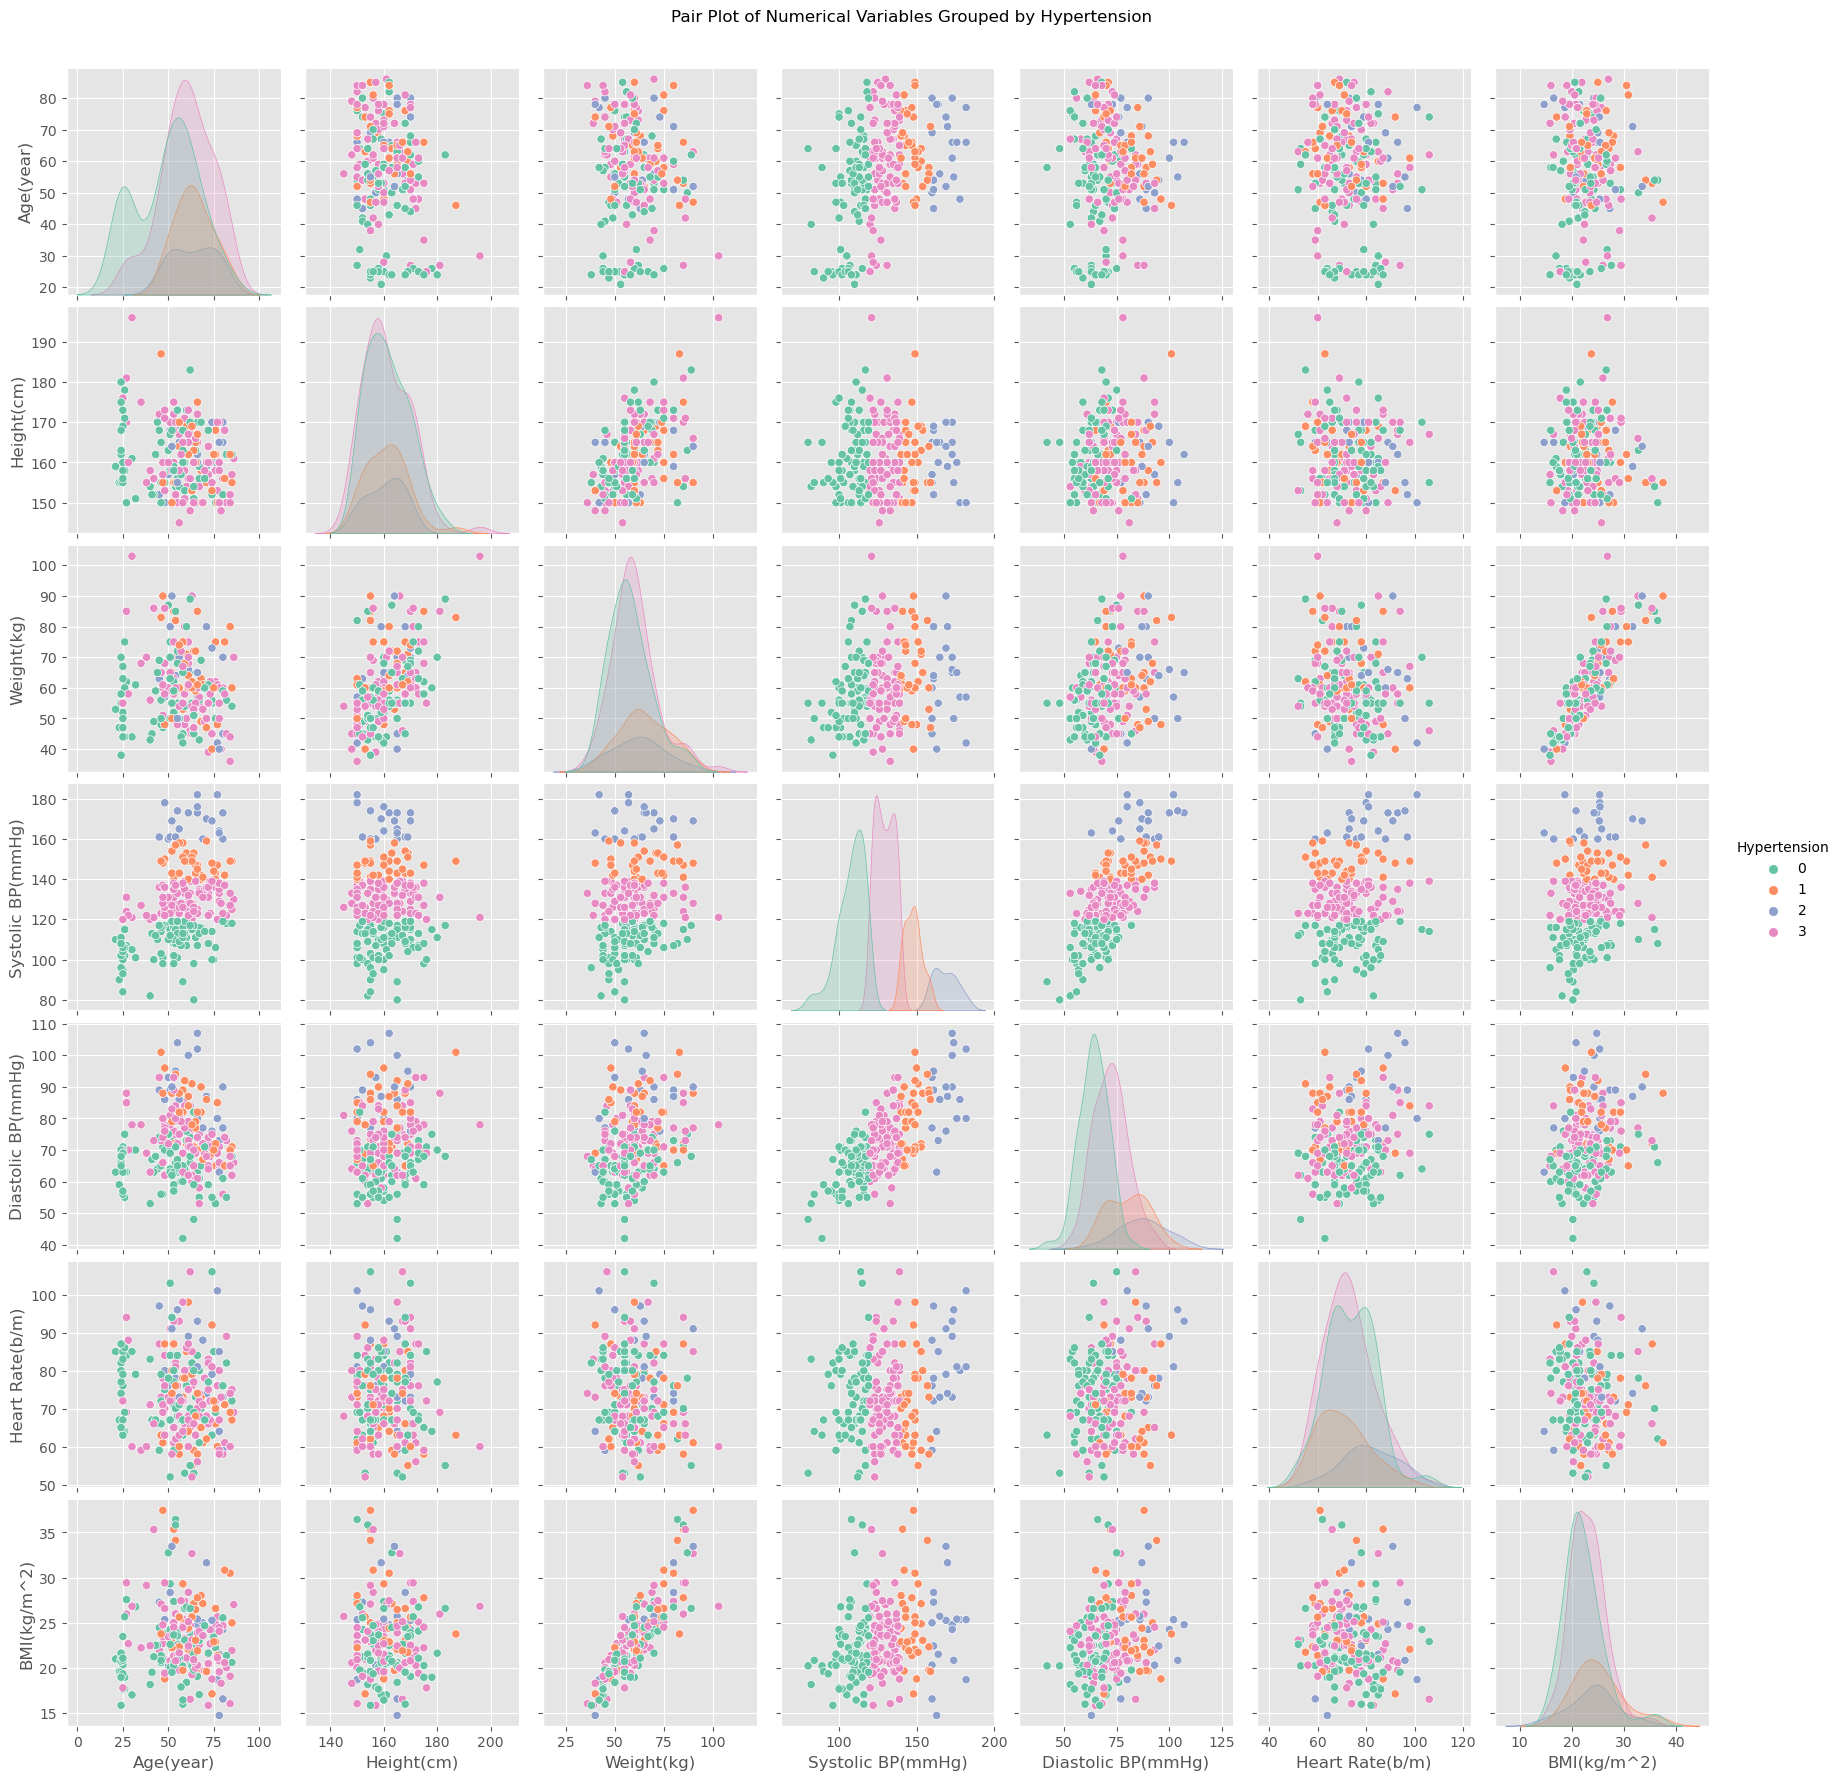

In [18]:
# Pair plot
sns.pairplot(df, vars=numerical_features, hue='Hypertension', palette='Set2')
plt.suptitle("Pair Plot of Numerical Variables Grouped by Hypertension", y=1.02)
plt.savefig('../fig/pair_plot_hue.png')
plt.show()

In [22]:
# # Vẽ heatmap của ma trận tương quan
# plt.figure(figsize=(12, 8))
# correlation_matrix = df[numerical_features].corr()

# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# plt.title("Heatmap of Correlation Matrix of Numerical Features", fontsize=16, fontweight='bold')
# plt.show()

# Sample Conclusion
1. Nam giới có tỷ lệ mắc bệnh hypertension cao hơn nữ giới.
2. Độ tuổi trung niên và cao niên (51-70) có nguy cơ mắc các bệnh lý như hypertension, diabetes, cerebral infarction, và cerebrovascular disease cao nhất.
3. Đối với nữ giới, khoảng tuổi phổ biến nhất bị hypertension là từ 51-60, trong khi đối với nam giới, khoảng tuổi phổ biến nhất là từ 61-70.
4. Có tương quan mạnh giữa: SBP-DBP, BMI-Weight, Hypertension-SBP

$$S_{SQI} = \dfrac{1}{N}\displaystyle\sum_{i=1}^N \left(x_i - \dfrac{\widehat{\mu}_x}{\sigma}\right)^3$$
